In [197]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler , FunctionTransformer
from sklearn.cluster import DBSCAN , KMeans 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score





In [198]:
df = pd.read_csv("CC GENERAL.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [199]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [200]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [201]:
imputer = SimpleImputer(strategy="median")

In [202]:
df[['MINIMUM_PAYMENTS']] = imputer.fit_transform(df[['MINIMUM_PAYMENTS']])

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

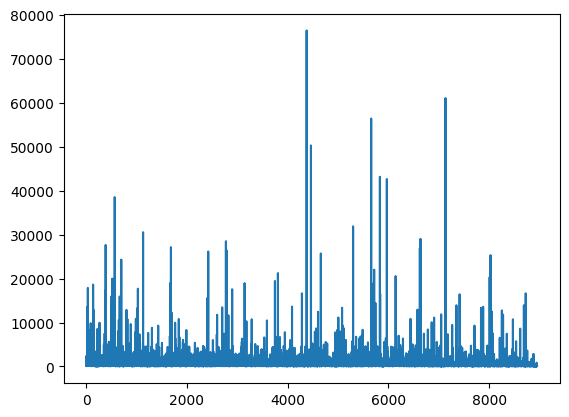

In [204]:
plt.plot(df['MINIMUM_PAYMENTS'])

In [205]:
df.dropna(subset=["CREDIT_LIMIT"], inplace=True)
df.drop(columns=["CUST_ID"], inplace=True)

In [206]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

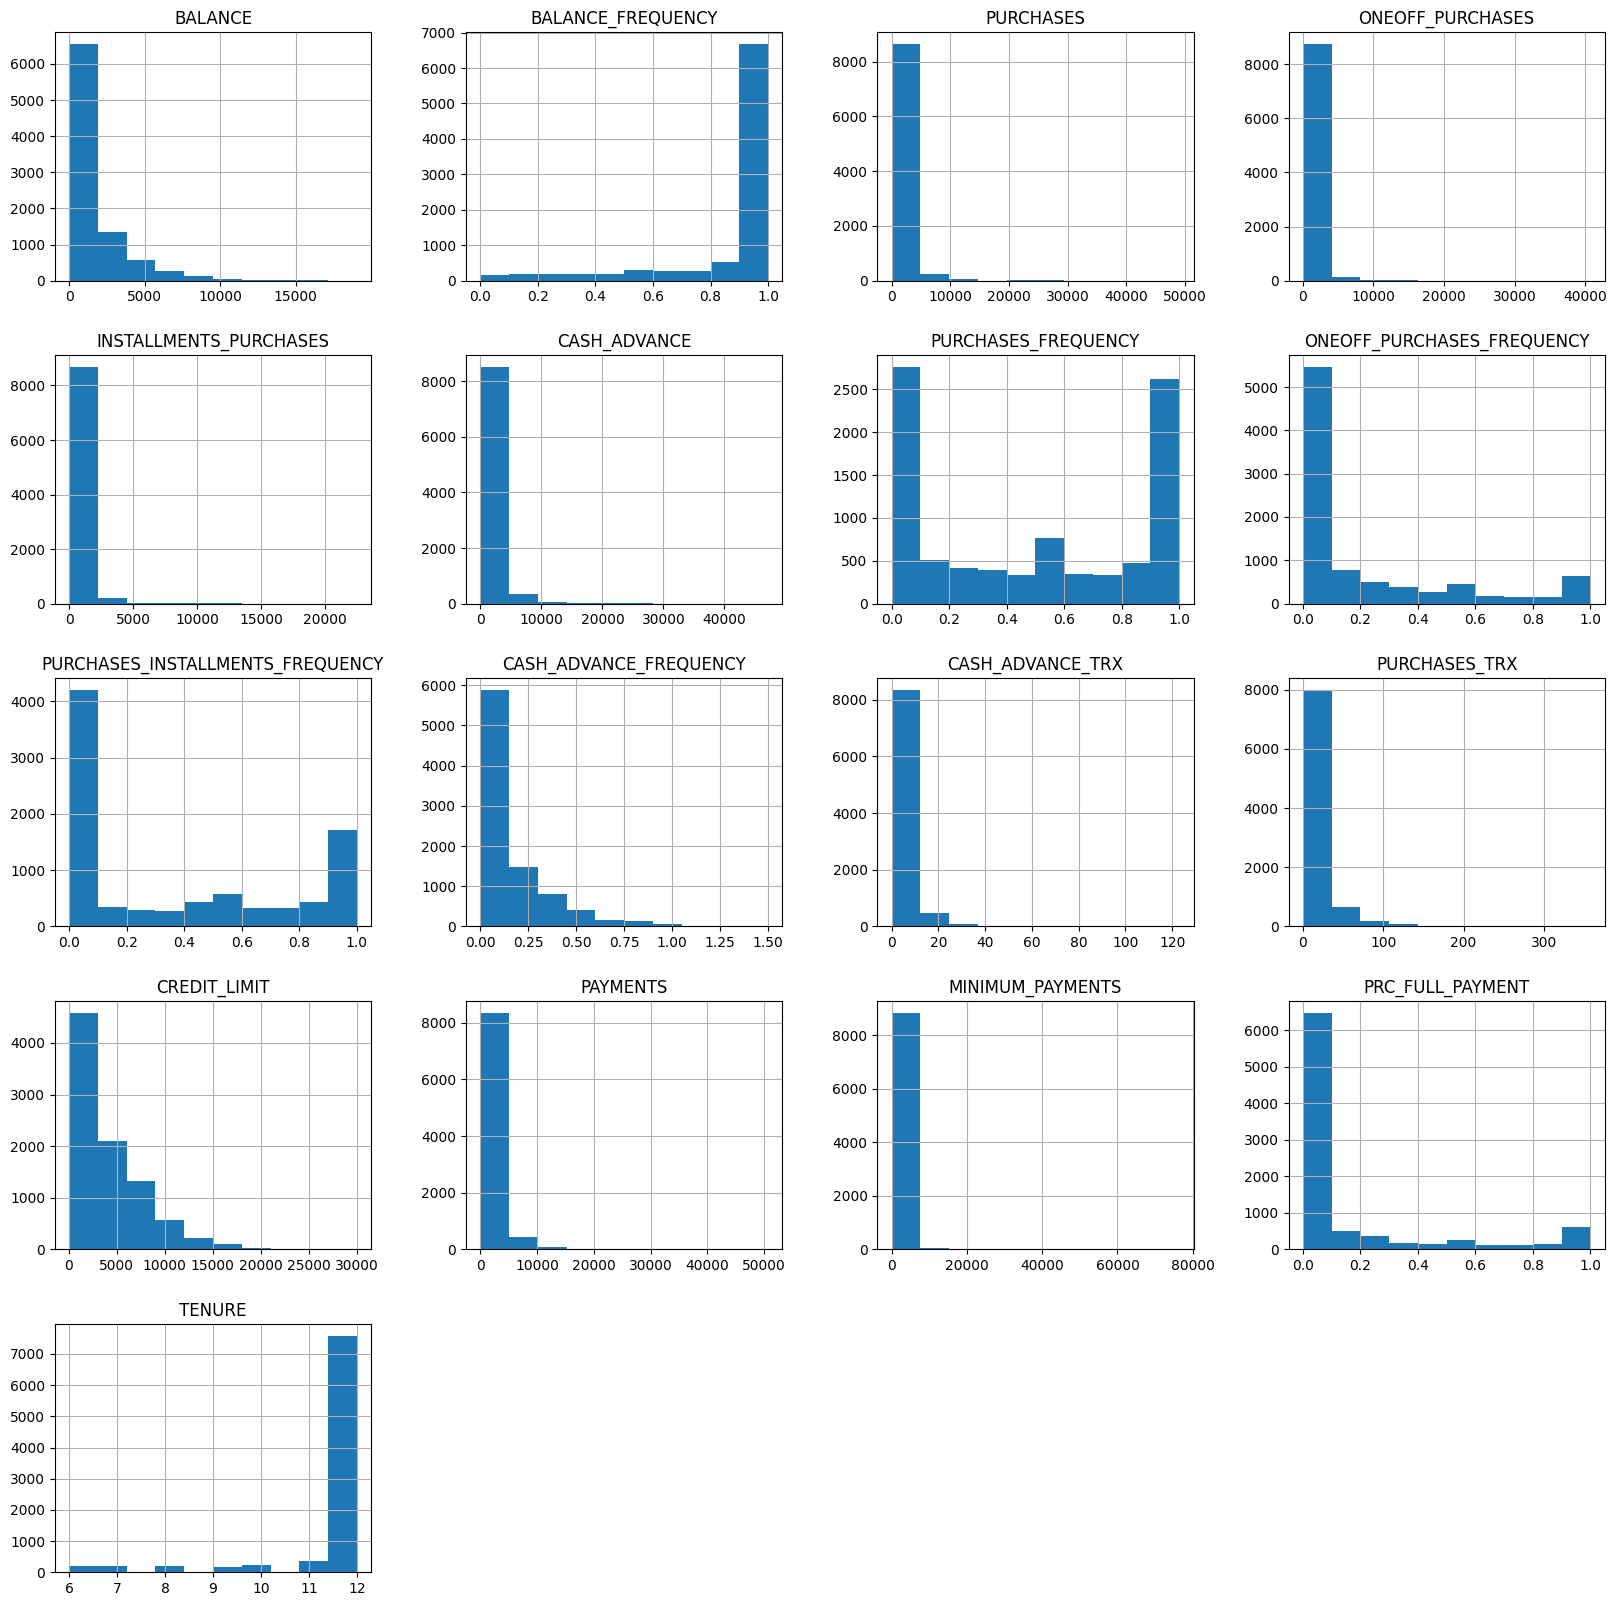

In [207]:
df.hist(figsize=(20,20))

In [208]:
rob_scaler = RobustScaler()
log_trans = FunctionTransformer(func = np.log1p , validate = True)

In [209]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [210]:
df2 = log_trans.transform(df)
df2 = pd.DataFrame(df2 , columns=df.columns)
df2

C:\Users\PCCV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,5.747301,0.000000,2.564949
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,3.384170,0.693147,5.677165,0.000000,5.677165,0.000000,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.788719,3.909748,0.405465,1.945910
8945,3.004851,0.693147,5.707110,0.000000,5.707110,0.000000,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.623517,5.747301,0.000000,1.945910
8946,3.194529,0.606136,4.979489,0.000000,4.979489,0.000000,0.606136,0.000000,0.510826,0.000000,0.000000,1.791759,6.908755,4.410016,4.423869,0.223144,1.945910
8947,2.671218,0.606136,0.000000,0.000000,0.000000,3.625907,0.000000,0.000000,0.000000,0.154151,1.098612,0.000000,6.216606,3.980615,4.038755,0.223144,1.945910


In [211]:
df2 = rob_scaler.fit_transform(df2)
df2 = pd.DataFrame(df2 , columns=df.columns)
df2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.098709,-1.667474,-0.400816,-0.575940,0.011167,0.000000,-0.440481,-0.305081,-0.132428,0.000000,0.000000,-0.446395,-0.783504,-0.901851,-0.525949,0.000000,0.000000
1,0.469390,-0.813879,-1.783332,-0.575940,-0.731440,1.250040,-0.710662,-0.305081,-0.275459,1.111990,1.000000,-0.946395,0.604504,0.978504,0.807411,1.502798,0.000000
2,0.379179,0.000000,0.229626,0.469773,-0.731440,0.000000,0.504223,2.336846,-0.275459,0.000000,0.000000,0.220964,0.653731,-0.200086,0.456219,0.000000,0.000000
3,0.233342,-3.510781,0.429786,0.573755,-0.731440,0.759880,-0.570371,0.000000,-0.275459,0.398875,0.430677,-0.630930,0.653731,-4.223180,0.000000,0.000000,0.000000
4,-0.023909,0.000000,-0.925948,-0.130537,-0.731440,0.000000,-0.570371,0.000000,-0.275459,0.000000,0.000000,-0.630930,-0.653517,-0.146029,-0.159235,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-1.225675,0.000000,-0.065315,-0.575940,0.191378,0.000000,0.504223,-0.305081,0.807670,0.000000,0.000000,-0.060773,-0.783504,-0.603939,-1.205025,3.036481,-0.619039
8945,-1.362833,0.000000,-0.056253,-0.575940,0.196246,0.000000,0.504223,-0.305081,0.807670,0.000000,0.000000,-0.060773,-0.783504,-0.707228,0.000000,0.000000,-0.619039
8946,-1.294247,-1.522289,-0.276445,-0.575940,0.077971,0.000000,0.351717,-0.305081,0.637357,0.000000,0.000000,-0.130930,-0.783504,-1.465936,-0.867876,1.671096,-0.619039
8947,-1.483471,-1.522289,-1.783332,-0.575940,-0.731440,0.516769,-0.710662,-0.305081,-0.275459,0.768179,0.682606,-0.946395,-1.277428,-1.734408,-1.120425,1.671096,-0.619039


In [212]:
#sns.pairplot(df2)

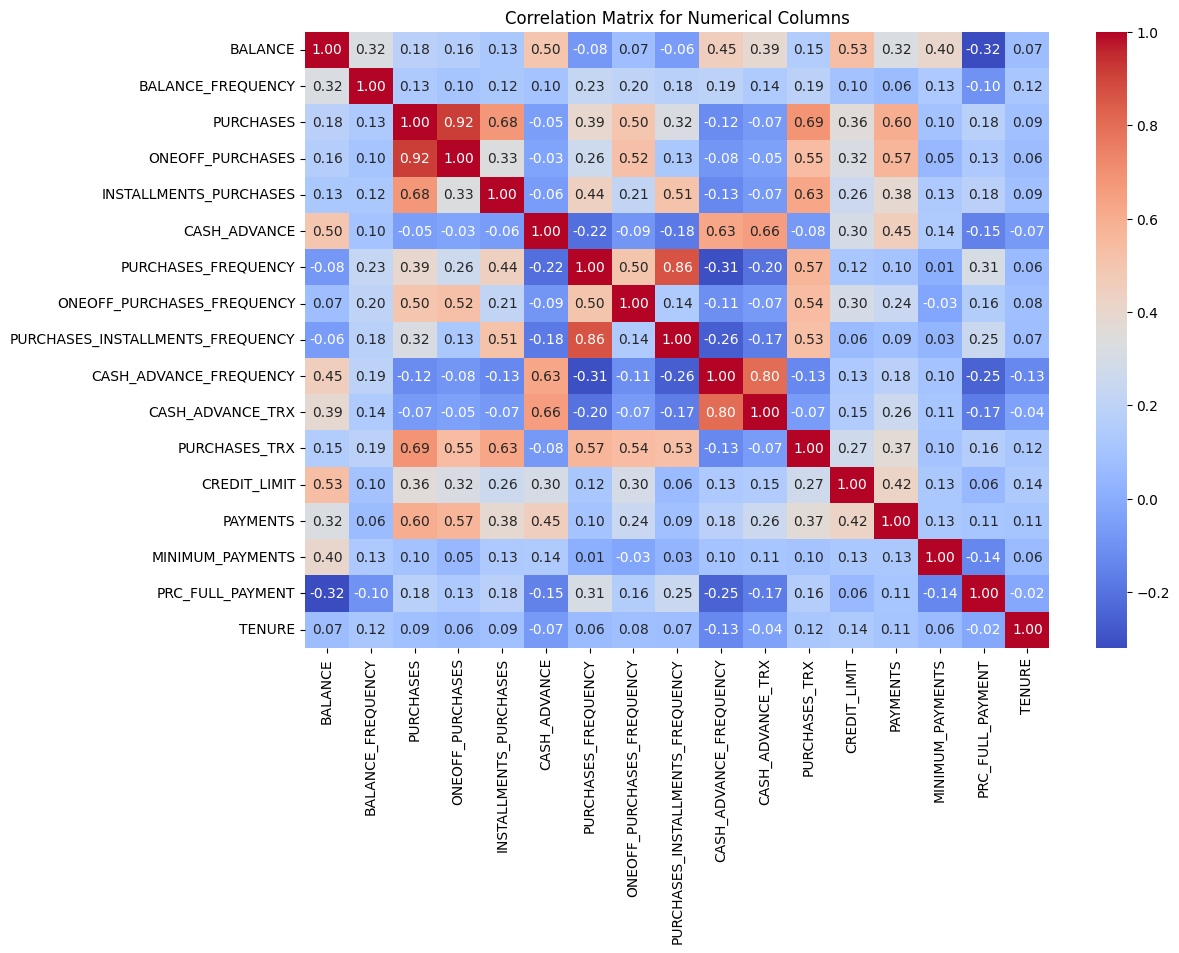

In [213]:
# Select only numerical columns from the DataFrame
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

 There's `high positive` correalation between `PURCHASES` & `ONEOFF_PURCHASES`

 Thers's `high positive` correalation between `PURCHASES_FREQUENCY` & `PURCHASES_INSTALLMENTS_FREQUENCY` 
 
 Thers's `high positive` correalation between `CASH_ADVANCE_FREQUENCY` & `CASH_ADVANCE_TRX` 

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

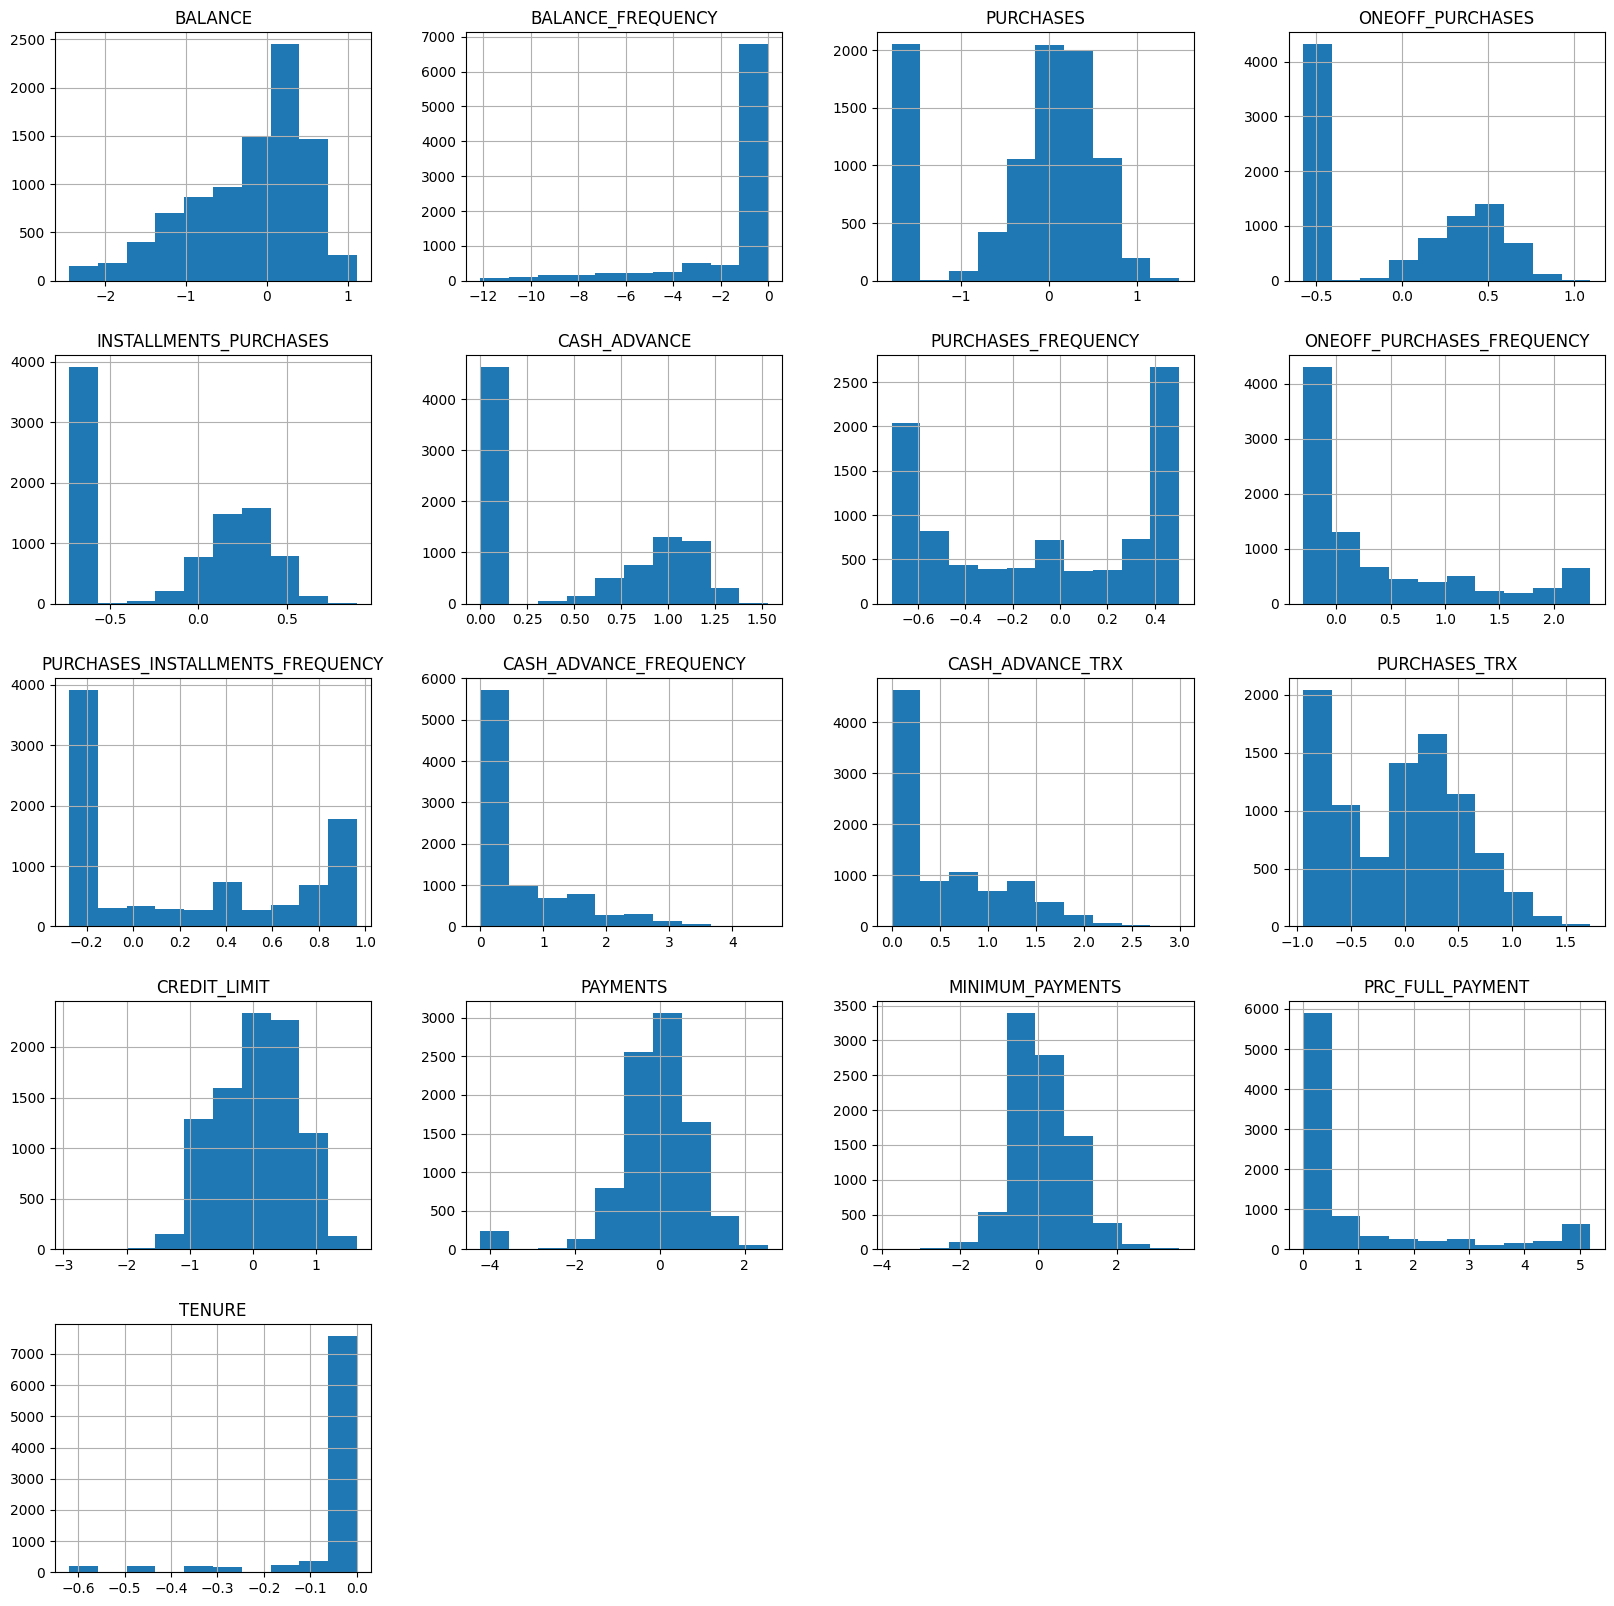

In [214]:
df2.hist(figsize=(20,20))

In [215]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters = kmeans.fit_predict(df2)
df_final = pd.DataFrame(df)
df_final['kmeans_cluster'] = clusters
df_final


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,kmeans_cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [216]:
inertia = kmeans.inertia_
print("Kmeans Inertia for " , optimal_clusters,"clusters is :" , inertia)
pca = PCA(n_components=2 , random_state=88)
pca_result = pca.fit_transform(df2)

Kmeans Inertia for  3 clusters is : 68817.8163371745


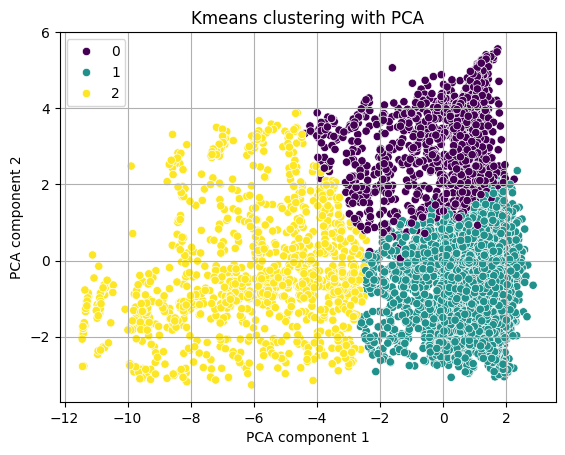

In [217]:
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1] ,hue=clusters ,palette='viridis')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.title('Kmeans clustering with PCA')
labels = [f'Cluster {c}' for c in range(optimal_clusters)]
plt.legend()
plt.grid()
plt.show()


In [218]:
sil_score = silhouette_score(df2 , clusters)
print("Silhouette Score : " , sil_score)

Silhouette Score :  0.3467500482153206


In [227]:
cluster1 = df_final[df_final['kmeans_cluster'] == 0]
cluster1.mean()

BALANCE                              224.373065
BALANCE_FREQUENCY                      0.915725
PURCHASES                           1958.770654
ONEOFF_PURCHASES                    1115.442192
INSTALLMENTS_PURCHASES               843.813277
CASH_ADVANCE                         142.733968
PURCHASES_FREQUENCY                    0.851554
ONEOFF_PURCHASES_FREQUENCY             0.337720
PURCHASES_INSTALLMENTS_FREQUENCY       0.660503
CASH_ADVANCE_FREQUENCY                 0.019067
CASH_ADVANCE_TRX                       0.444370
PURCHASES_TRX                         25.834120
CREDIT_LIMIT                        5038.907313
PAYMENTS                            2117.215691
MINIMUM_PAYMENTS                     211.151194
PRC_FULL_PAYMENT                       0.683343
TENURE                                11.503034
kmeans_cluster                         0.000000
dtype: float64

`Group ( 1 )`    

                      1-They have a Moderate or good Cash Flow 

                      2-They have a moderate/high purchase frequency but more with installments than cash 


## --> `MIDDLE CLASS`

In [226]:
cluster2 = df_final[df_final['kmeans_cluster'] == 1]
cluster2.mean()

BALANCE                             2154.357071
BALANCE_FREQUENCY                      0.971160
PURCHASES                            905.855202
ONEOFF_PURCHASES                     544.841998
INSTALLMENTS_PURCHASES               361.215558
CASH_ADVANCE                        1273.676385
PURCHASES_FREQUENCY                    0.447462
ONEOFF_PURCHASES_FREQUENCY             0.196515
PURCHASES_INSTALLMENTS_FREQUENCY       0.326233
CASH_ADVANCE_FREQUENCY                 0.179452
CASH_ADVANCE_TRX                       4.331259
PURCHASES_TRX                         14.058720
CREDIT_LIMIT                        4523.290911
PAYMENTS                            1729.071020
MINIMUM_PAYMENTS                    1120.048878
PRC_FULL_PAYMENT                       0.023345
TENURE                                11.561832
kmeans_cluster                         1.000000
dtype: float64

`Group ( 2 )`

                            1- They have a very high cash flow 
                            2- but they don't buy many things ( Have a low purchase frequency ) 

# --> `RICH CLASS`


In [228]:
cluster3 = df_final[df_final['kmeans_cluster'] == 2]
cluster3.mean()

BALANCE                              140.058623
BALANCE_FREQUENCY                      0.339555
PURCHASES                            330.968999
ONEOFF_PURCHASES                     194.819766
INSTALLMENTS_PURCHASES               136.732636
CASH_ADVANCE                         472.815034
PURCHASES_FREQUENCY                    0.268175
ONEOFF_PURCHASES_FREQUENCY             0.066389
PURCHASES_INSTALLMENTS_FREQUENCY       0.198238
CASH_ADVANCE_FREQUENCY                 0.047099
CASH_ADVANCE_TRX                       1.061718
PURCHASES_TRX                          4.366138
CREDIT_LIMIT                        3670.278936
PAYMENTS                            1280.825255
MINIMUM_PAYMENTS                     191.340788
PRC_FULL_PAYMENT                       0.180190
TENURE                                11.306922
kmeans_cluster                         2.000000
dtype: float64

`Group ( 3 ) `  

                 1- They have very Low cash flow 
                 2- They have very Low Purchase frequency (but when they buy , they do it with installments more than cash )

# -->`POOR CLASS`